<a href="https://www.kaggle.com/code/yomritoyj06/decisiontrees?scriptVersionId=187281760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# Making our own synthetic dataset having 3 classes

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0)

# Standard splitting of data into training and testing set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Getting an idea of the scatter of the data by visualization

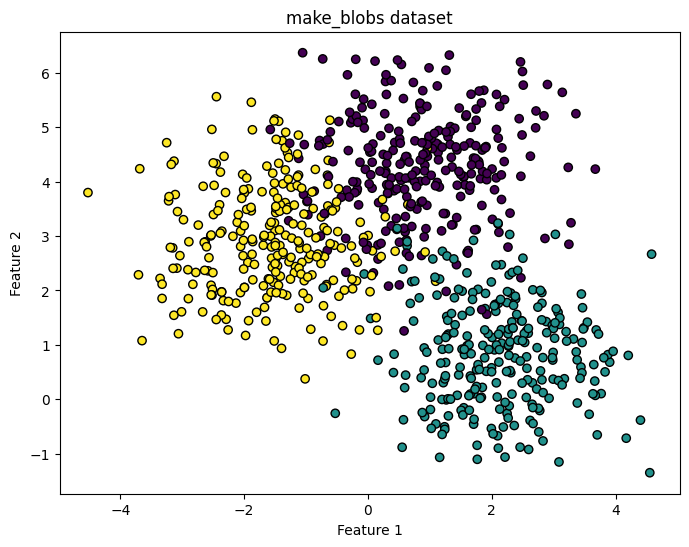

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_blobs dataset')
plt.show()

# Importing Decision tree and instantiating its class

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier()

# Pre-pruning

In [8]:
clf2 = DecisionTreeClassifier(max_depth = 5)

In [9]:
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

# Visualization of the boundary lines

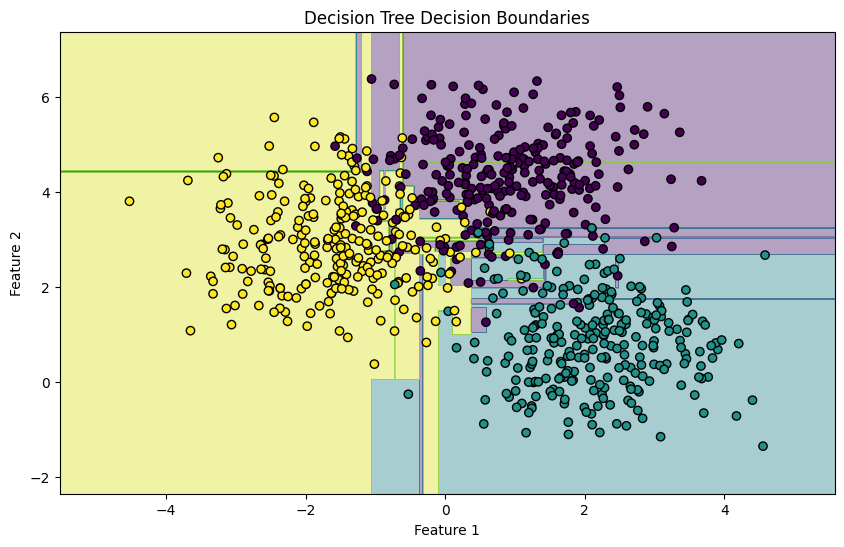

In [11]:
# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries')
plt.savefig('plot1.png')
plt.show()

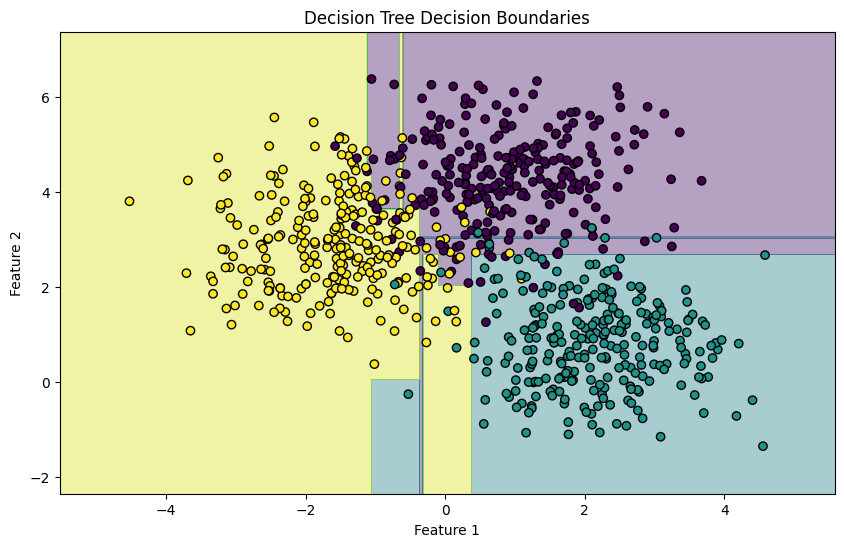

In [12]:
# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries')
plt.savefig('plot2.png')
plt.show()

# Checking the performance of the models

In [13]:
from sklearn.metrics import accuracy_score

# Pruned tree performed better slightly on test data

In [14]:
print(accuracy_score(y_test, clf.predict(X_test)))
print(accuracy_score(y_test, clf2.predict(X_test)))

0.88
0.88


In [15]:
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_train, clf2.predict(X_train)))

1.0
0.94375
